#### This notebook calculates the bayesian integration of individual weights without considering any prior

In [1]:
import init_paths
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import cortico_cereb_connectivity.run_model as rm
import Functional_Fusion.dataset as fdata
import glob
import matplotlib.pyplot as plt
from cortico_cereb_connectivity.scripts.script_train_eval_models_bayes import *
import matplotlib.pyplot as plt
import SUITPy as suit

Matplotlib created a temporary cache directory at /tmp/matplotlib-0b58kdjt because the default path (/localscratch/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [ ]:
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset=['MDTB'], eval_ses="ses-s2",
            cerebellum='MNISymC3',
            eval_id='bayes_vox', model='bayes_vox', ext_list=[8])

In [ ]:
eval_models(train_dataset="MDTB", train_ses="ses-s1",
            eval_dataset=['MDTB'], eval_ses="ses-s2",
            cerebellum='MNISymC3',
            eval_id='bayes', model='bayes', ext_list=[8])

In [2]:
all_dataframe=rm.comb_eval(models=['loo', 'avg', 'bayes', 'bayes_vox'],eval_data=['MDTBs2'], cerebellum='MNISymC3',methods=['L2reg'])
all_dataframe['model_type'] = all_dataframe['model']

Text(0.5, 1.0, 'train: MDTB-s1, eval: MDTB-s2')

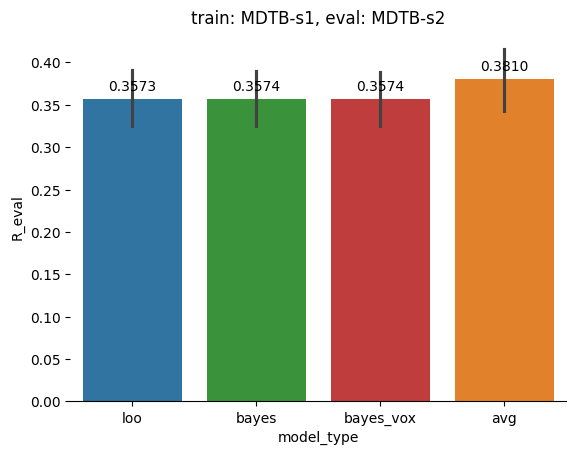

In [3]:
means = all_dataframe.groupby('model_type')['R_eval'].mean().sort_values(ascending=True)
ax = sns.barplot(data=all_dataframe, x='model_type', y='R_eval', hue='model_type', order=means.index.to_list())
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_title('train: MDTB-s1, eval: MDTB-s2') 

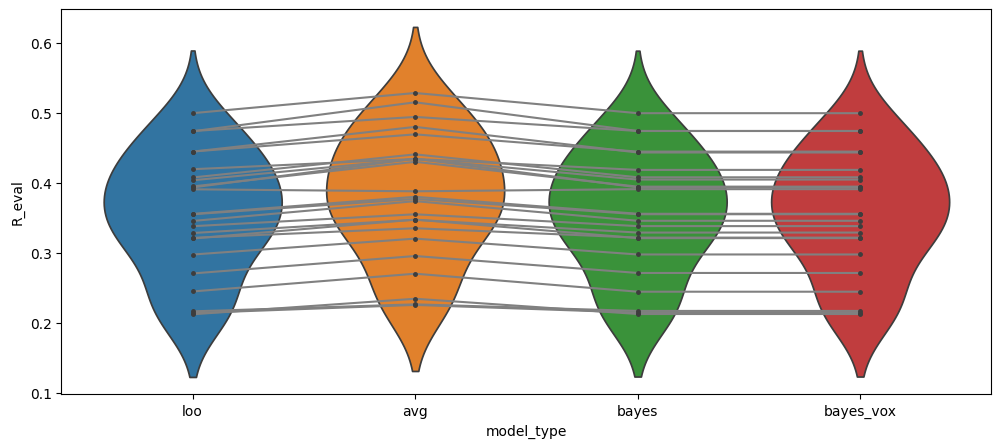

In [6]:
plt.figure(figsize=(12,5))
sns.violinplot(data=all_dataframe, x='model_type', y='R_eval', inner='point', hue='model_type')#, order=means.index.to_list())
for i, sub in enumerate(all_dataframe['eval_subj'].unique()):
    plt.plot(range(len(all_dataframe['model_type'].unique())), all_dataframe[all_dataframe['eval_subj']==sub]['R_eval'], color='grey')